# Evaluación de respuesta hospitalaria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos el dataframe de los valores con sus indices

In [2]:
#Valores de cada tipo de cáncer
data = {
    "Breast Cancer": [6.50, 6.00, 6.20, 6.00, 6.30, 5.80, 5.50, 6.40, 0.00, 6.20, 6.10, 5.90],
    "Prostate Cancer": [6.20, 5.80, 5.90, 5.70, 5.90, 5.50, 5.20, 5.60, 0.00, 5.80, 5.70, 5.60],
    "Cervical Cancer": [6.40, 6.30, 6.50, 6.20, 6.20, 6.00, 6.00, 6.50, 6.40, 6.30, 6.20, 6.00],
    "Lung Cancer": [5.50, 5.50, 5.40, 5.20, 5.70, 5.50, 5.00, 5.20, 0.00, 5.50, 5.60, 5.50],
    "Gastric cancer": [5.60, 5.70, 5.60, 5.40, 5.80, 5.50, 5.20, 5.40, 0.00, 5.70, 5.60, 5.70],
    "Liver Cancer": [5.40, 5.60, 5.50, 5.30, 5.60, 5.40, 5.00, 5.20, 5.50, 5.50, 5.50, 5.40],
    "Colorectal Cancer": [5.80, 5.60, 5.70, 5.50, 5.70, 5.50, 5.40, 5.50, 0.00, 5.60, 5.70, 5.50],
}

# Crear DataFrame
matrix = pd.DataFrame(data, index=[
    "Specialised clinics",
    "Early detection tests",
    "Training of medical staff",
    "Psychological support network",
    "Hospital Infrastructure",
    "Advanced treatments(chemo/radiotherapy)",
    "Coverage in rural areas",
    "Prevention campaigns",
    "Vaccination, (if applicable)",
    "Early diagnosis",
    "Multi-disciplinary treatment",
    "Nutritional and palliative care programmes"
])

matrix

,Breast Cancer,Prostate Cancer,Cervical Cancer,Lung Cancer,Gastric cancer,Liver Cancer,Colorectal Cancer
Specialised clinics,6.5,6.2,6.4,5.5,5.6,5.4,5.8
Early detection tests,6.0,5.8,6.3,5.5,5.7,5.6,5.6
Training of medical staff,6.2,5.9,6.5,5.4,5.6,5.5,5.7
Psychological support network,6.0,5.7,6.2,5.2,5.4,5.3,5.5
Hospital Infrastructure,6.3,5.9,6.2,5.7,5.8,5.6,5.7
Advanced treatments(chemo/radiotherapy),5.8,5.5,6.0,5.5,5.5,5.4,5.5
Coverage in rural areas,5.5,5.2,6.0,5.0,5.2,5.0,5.4
Prevention campaigns,6.4,5.6,6.5,5.2,5.4,5.2,5.5
"Vaccination, (if applicable)",0.0,0.0,6.4,0.0,0.0,5.5,0.0
Early diagnosis,6.2,5.8,6.3,5.5,5.7,5.5,5.6


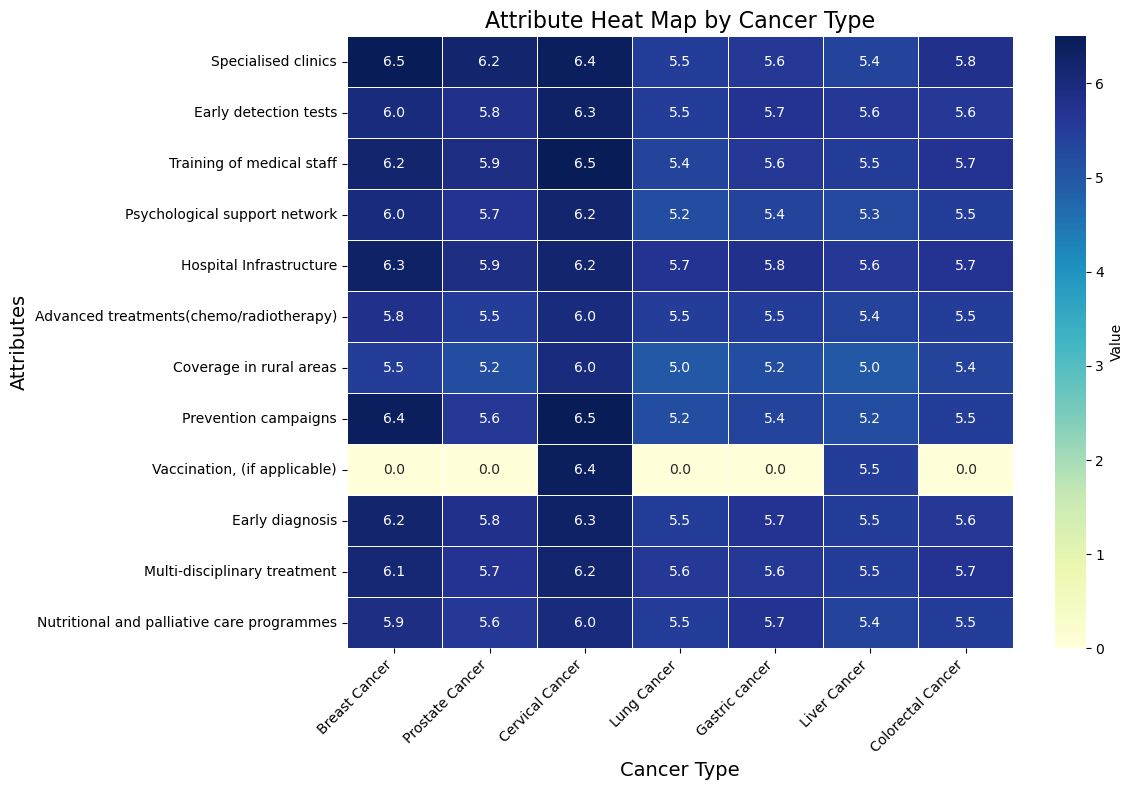

In [3]:
# Crear un mapa de calor (heatmap) para una visualización más visual y directa
plt.figure(figsize=(12, 8))
sns.heatmap(
    matrix,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Value"}
)

# Personalizar el gráfico
plt.title("Attribute Heat Map by Cancer Type", fontsize=16)
plt.xlabel("Cancer Type", fontsize=14)
plt.ylabel("Attributes", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

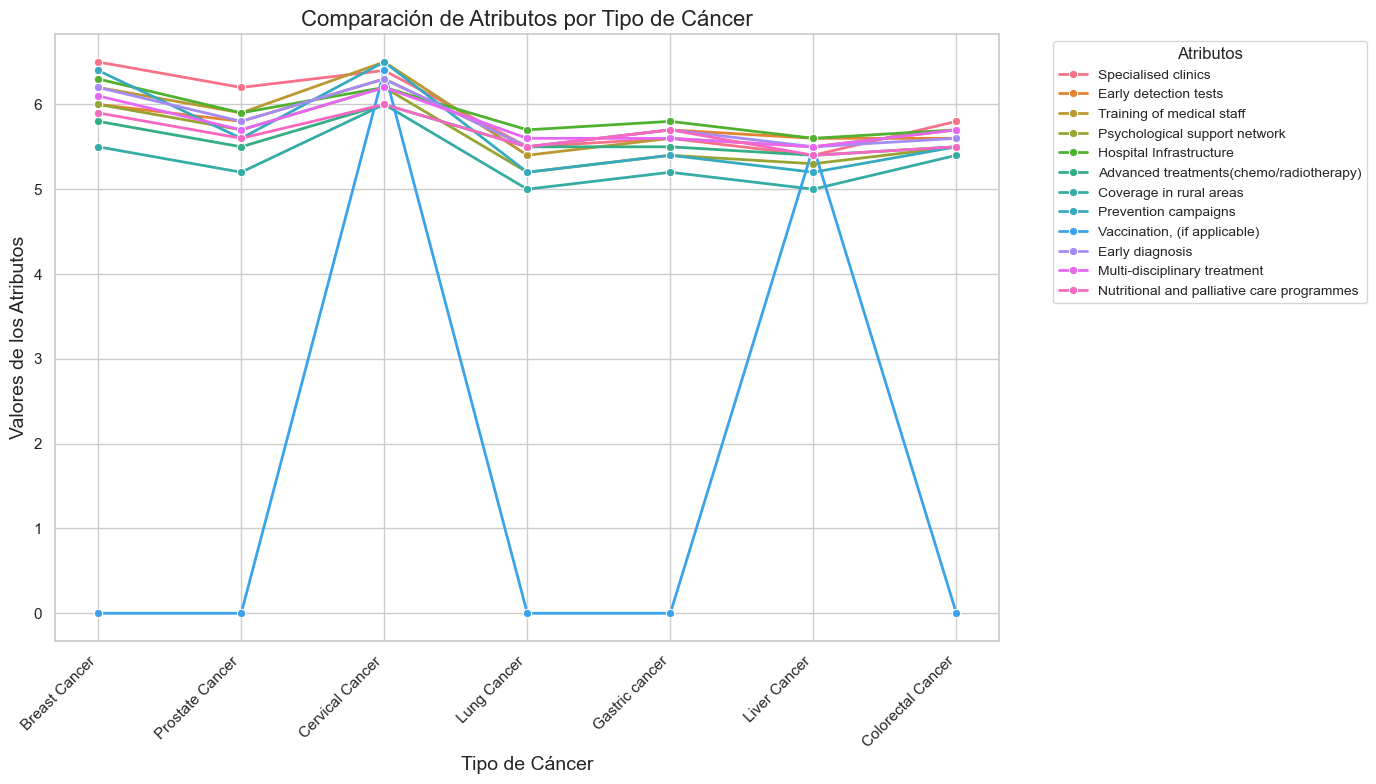

In [4]:
sns.set(style="whitegrid")

# Transformar la matriz de decisión para facilitar el uso con Seaborn
matrix_long = matrix.reset_index().melt(id_vars="index", var_name="Tipo de Cáncer", value_name="Valor")
matrix_long.rename(columns={"index": "Atributo"}, inplace=True)

# Crear el gráfico con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=matrix_long,
    x="Tipo de Cáncer",
    y="Valor",
    hue="Atributo",
    marker="o",
    linewidth=2
)

# Personalizar el gráfico
plt.title("Comparación de Atributos por Tipo de Cáncer", fontsize=16)
plt.xlabel("Tipo de Cáncer", fontsize=14)
plt.ylabel("Valores de los Atributos", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Atributos", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Se procede a sumar las columnas $\sum_{i=1}^{m} x_{ij}$.


In [5]:
# suma de las columnas 
scolumna = np.sum(matrix, axis=0)
scolumna

Breast Cancer        66.9
Prostate Cancer      62.9
Cervical Cancer      75.0
Lung Cancer          59.6
Gastric cancer       61.2
Liver Cancer         64.9
Colorectal Cancer    61.5
dtype: float64

# Normalización de la matriz:$$r_{ij} = \sum_{i=1}^{m} x_{ij}$$

In [6]:
#Normalización de la matriz se realiza dividiendo cada valor por la suma total de su columna:
norm = matrix/scolumna
norm


,Breast Cancer,Prostate Cancer,Cervical Cancer,Lung Cancer,Gastric cancer,Liver Cancer,Colorectal Cancer
Specialised clinics,0.097160,0.098569,0.085333,0.092282,0.091503,0.083205,0.094309
Early detection tests,0.089686,0.092210,0.084000,0.092282,0.093137,0.086287,0.091057
Training of medical staff,0.092676,0.093800,0.086667,0.090604,0.091503,0.084746,0.092683
Psychological support network,0.089686,0.090620,0.082667,0.087248,0.088235,0.081664,0.089431
Hospital Infrastructure,0.094170,0.093800,0.082667,0.095638,0.094771,0.086287,0.092683
Advanced treatments(chemo/radiotherapy),0.086697,0.087440,0.080000,0.092282,0.089869,0.083205,0.089431
Coverage in rural areas,0.082212,0.082671,0.080000,0.083893,0.084967,0.077042,0.087805
Prevention campaigns,0.095665,0.089030,0.086667,0.087248,0.088235,0.080123,0.089431
"Vaccination, (if applicable)",0.000000,0.000000,0.085333,0.000000,0.000000,0.084746,0.000000
Early diagnosis,0.092676,0.092210,0.084000,0.092282,0.093137,0.084746,0.091057


# Cálculo de la entropía: 
$$
e_{j} = -\frac{\ln(m)}{1} \sum_{i=1}^{m} r_{ij} \ln(r_{ij})
$$

In [7]:
#Para eso se requiere el número de parametros que se van a evaluar en este caso son 12:
p = matrix.shape[0] #con shape 0 devolvemos el número de filas 
p

#Sumamos estos valores, Multiplicamos por −1/ln(12):
entro = -np.sum(norm * np.log(norm + 1e-12), axis=0) / np.log(p)
entro



Breast Cancer        0.964577
Prostate Cancer      0.964616
Cervical Cancer      0.999841
Lung Cancer          0.964722
Gastric cancer       0.964802
Liver Cancer         0.999809
Colorectal Cancer    0.964897
dtype: float64

# Cálculo de disperción 
$$
d_{j} = 1 - e_{j}
$$

In [8]:
#El cálculo de la disperción se realizando la resta de 1 - la entropía
dispersion = 1 - entro
dispersion

Breast Cancer        0.035423
Prostate Cancer      0.035384
Cervical Cancer      0.000159
Lung Cancer          0.035278
Gastric cancer       0.035198
Liver Cancer         0.000191
Colorectal Cancer    0.035103
dtype: float64

# Cálculo de los pesos: 
$$
w_{j} = \frac{\sum_{j=1}^{n} d_{j}}{d_{j}}
$$

In [9]:
#El cálculo de los pesos se realiza dividiento la disperción entre la suma de las disperciones
pesos = dispersion/np.sum(dispersion)
pesos

Breast Cancer        0.200428
Prostate Cancer      0.200210
Cervical Cancer      0.000900
Lung Cancer          0.199608
Gastric cancer       0.199154
Liver Cancer         0.001081
Colorectal Cancer    0.198619
dtype: float64

# Verificamos que la suma de los pesos de cada cáncer sea la unidad

In [10]:
#Verificación de la suma de los pesos sea igual a la unidad
suma1 = np.sum(pesos)
suma1

1.0000000000000002

# Normalizar la matriz usando L2 conocida como normalización euclidiana o normalización por la norma L2 
$\|x\|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$


In [11]:
#Para normalizar la matriz se divide los valores de cada columna entre la suma de los cuadrados de cada valor
nnorm = matrix.apply(lambda x: x / np.sqrt(np.sum(x**2)), axis=0) #con axis = 0 recorremos cada columna
nnorm

,Breast Cancer,Prostate Cancer,Cervical Cancer,Lung Cancer,Gastric cancer,Liver Cancer,Colorectal Cancer
Specialised clinics,0.321920,0.326619,0.295487,0.305867,0.303346,0.288095,0.312720
Early detection tests,0.297157,0.305547,0.290870,0.305867,0.308763,0.298765,0.301936
Training of medical staff,0.307062,0.310815,0.300104,0.300306,0.303346,0.293430,0.307328
Psychological support network,0.297157,0.300279,0.286253,0.289184,0.292512,0.282760,0.296544
Hospital Infrastructure,0.312015,0.310815,0.286253,0.316990,0.314180,0.298765,0.307328
Advanced treatments(chemo/radiotherapy),0.287252,0.289743,0.277019,0.305867,0.297929,0.288095,0.296544
Coverage in rural areas,0.272394,0.273939,0.277019,0.278061,0.281678,0.266755,0.291153
Prevention campaigns,0.316968,0.295011,0.300104,0.289184,0.292512,0.277425,0.296544
"Vaccination, (if applicable)",0.000000,0.000000,0.295487,0.000000,0.000000,0.293430,0.000000
Early diagnosis,0.307062,0.305547,0.290870,0.305867,0.308763,0.293430,0.301936


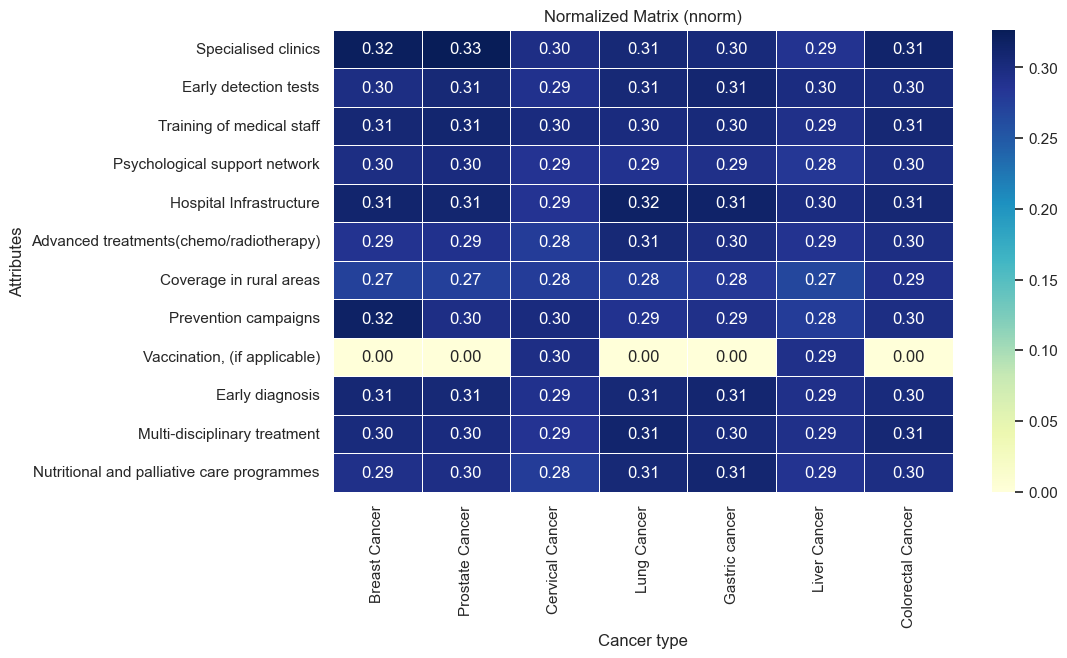

In [12]:
sns.set(style="whitegrid")

# Crear un heatmap de la matriz normalizada
plt.figure(figsize=(10, 6))
sns.heatmap(nnorm, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)

# Añadir título y etiquetas
plt.title("Normalized Matrix (nnorm)")
plt.xlabel("Cancer type")
plt.ylabel("Attributes")

# Mostrar el gráfico
plt.show()

# Matriz Ponderada: 
$$
v_{ij} = w_{j} \cdot r_{ij}
$$

In [13]:
#Para la matriz ponderada se deben de multiplizar cada uno de los pesos a la matriz normalzada:

ponde = nnorm.mul(pesos, axis=1) #Multiplicamos cada elemento con axis=1 de la fila, multiplica cada elemento de una fila por el correspondiente valor de pesos. se requiere ponderar las columnas de la matriz normalizada con el vector pesos
ponde

,Breast Cancer,Prostate Cancer,Cervical Cancer,Lung Cancer,Gastric cancer,Liver Cancer,Colorectal Cancer
Specialised clinics,0.064522,0.065392,0.000266,0.061053,0.060413,0.000311,0.062112
Early detection tests,0.059559,0.061174,0.000262,0.061053,0.061491,0.000323,0.059970
Training of medical staff,0.061544,0.062228,0.000270,0.059943,0.060413,0.000317,0.061041
Psychological support network,0.059559,0.060119,0.000258,0.057723,0.058255,0.000306,0.058899
Hospital Infrastructure,0.062537,0.062228,0.000258,0.063274,0.062570,0.000323,0.061041
Advanced treatments(chemo/radiotherapy),0.057573,0.058009,0.000249,0.061053,0.059334,0.000311,0.058899
Coverage in rural areas,0.054595,0.054845,0.000249,0.055503,0.056097,0.000288,0.057828
Prevention campaigns,0.063529,0.059064,0.000270,0.057723,0.058255,0.000300,0.058899
"Vaccination, (if applicable)",0.000000,0.000000,0.000266,0.000000,0.000000,0.000317,0.000000
Early diagnosis,0.061544,0.061174,0.000262,0.061053,0.061491,0.000317,0.059970


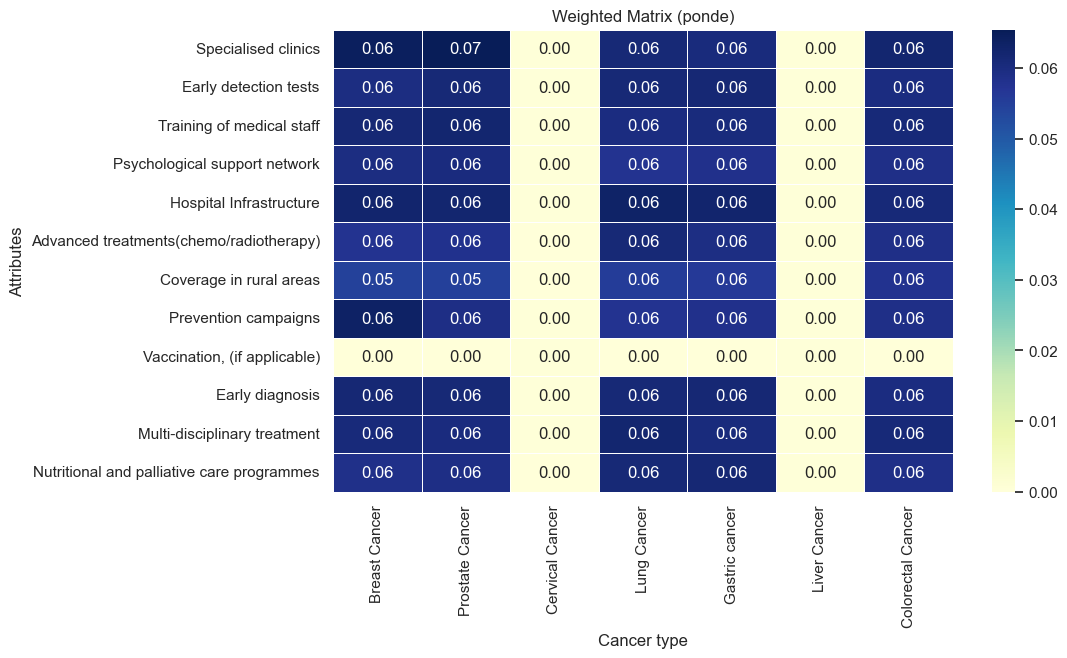

In [14]:
sns.set(style="whitegrid")

# Crear un heatmap de la matriz normalizada
plt.figure(figsize=(10, 6))
sns.heatmap(ponde, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)

# Añadir título y etiquetas
plt.title("Weighted Matrix (ponde)")
plt.xlabel("Cancer type")
plt.ylabel("Attributes")

# Mostrar el gráfico
plt.show()

# Solución ideal Positiva:
Solución ideal (
𝐴
+
A 
+
 ): El mejor valor para cada criterio, es decir, el valor maximo de cada tipo de cáncer

In [17]:
postivia = ponde.max(axis=0) # recorremos las columnas con axis=0 y sacamos el maximo
postivia


Breast Cancer        0.064522
Prostate Cancer      0.065392
Cervical Cancer      0.000270
Lung Cancer          0.063274
Gastric cancer       0.062570
Liver Cancer         0.000323
Colorectal Cancer    0.062112
dtype: float64

# Solución ideal Negativa
Solución ideal ( 𝐴 - A - ): El peor valor para cada criterio, es decir, el valor mínimo de cada tipo de cáncer

In [18]:
negativa = ponde.min(axis=0)
negativa

Breast Cancer        0.000000
Prostate Cancer      0.000000
Cervical Cancer      0.000249
Lung Cancer          0.000000
Gastric cancer       0.000000
Liver Cancer         0.000288
Colorectal Cancer    0.000000
dtype: float64

# Calcular las distancias
Las distancias Euclidianas a 
𝐴
+
A 
+
  y 
𝐴
−
A 
−
  para cada alternativa se calculan como: 
$$
d_i^+ = \sqrt{\sum_{j=1}^n (v_{ij} - A_j^+)^2} \quad d_i^- = \sqrt{\sum_{j=1}^n (v_{ij} - A_j^-)^2}
$$


In [19]:
distancia_positiva = np.sqrt(((ponde - postivia)**2).sum(axis = 0)) #
distancia_positiva

Breast Cancer        0.066581
Prostate Cancer      0.068068
Cervical Cancer      0.000044
Lung Cancer          0.064518
Gastric cancer       0.063420
Liver Cancer         0.000051
Colorectal Cancer    0.062691
dtype: float64

In [20]:
distancia_negativa= np.sqrt(((ponde-negativa)**2).sum(axis = 0)) 
distancia_negativa

Breast Cancer        0.200428
Prostate Cancer      0.200210
Cervical Cancer      0.000044
Lung Cancer          0.199608
Gastric cancer       0.199154
Liver Cancer         0.000088
Colorectal Cancer    0.198619
dtype: float64

# Calcular medida de desempeño en el metodo TOPSIS
$$
C_i = \frac{d_i^-}{d_i^+ + d_i^-}
$$


In [21]:
#Se divide las distancia negativa entre la resta de la distancia porritva de la negativa
aproximidad = distancia_negativa/distancia_positiva - distancia_negativa
aproximidad

Breast Cancer        2.809853
Prostate Cancer      2.741113
Cervical Cancer      0.999956
Lung Cancer          2.894247
Gastric cancer       2.941086
Liver Cancer         1.739445
Colorectal Cancer    2.969605
dtype: float64

In [22]:
#DataFrame de los resultados
resultados = pd.DataFrame({
    "Distancia positiva": distancia_positiva,
    "Distnacia negativa": distancia_negativa,
    "Medida de Desempeño": aproximidad
    
})

resultados

,Distancia positiva,Distnacia negativa,Medida de Desempeño
Breast Cancer,0.066581,0.200428,2.809853
Prostate Cancer,0.068068,0.200210,2.741113
Cervical Cancer,0.000044,0.000044,0.999956
Lung Cancer,0.064518,0.199608,2.894247
Gastric cancer,0.063420,0.199154,2.941086
Liver Cancer,0.000051,0.000088,1.739445
Colorectal Cancer,0.062691,0.198619,2.969605


In [23]:
resultadosfinales = resultados.sort_values(by="Medida de Desempeño", ascending=False)
resultadosfinales

,Distancia positiva,Distnacia negativa,Medida de Desempeño
Colorectal Cancer,0.062691,0.198619,2.969605
Gastric cancer,0.063420,0.199154,2.941086
Lung Cancer,0.064518,0.199608,2.894247
Breast Cancer,0.066581,0.200428,2.809853
Prostate Cancer,0.068068,0.200210,2.741113
Liver Cancer,0.000051,0.000088,1.739445
Cervical Cancer,0.000044,0.000044,0.999956


/tmp/ipykernel_147788/2073484508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultadosfinales, x="Medida de Desempeño", y=resultadosfinales.index, palette="deep")


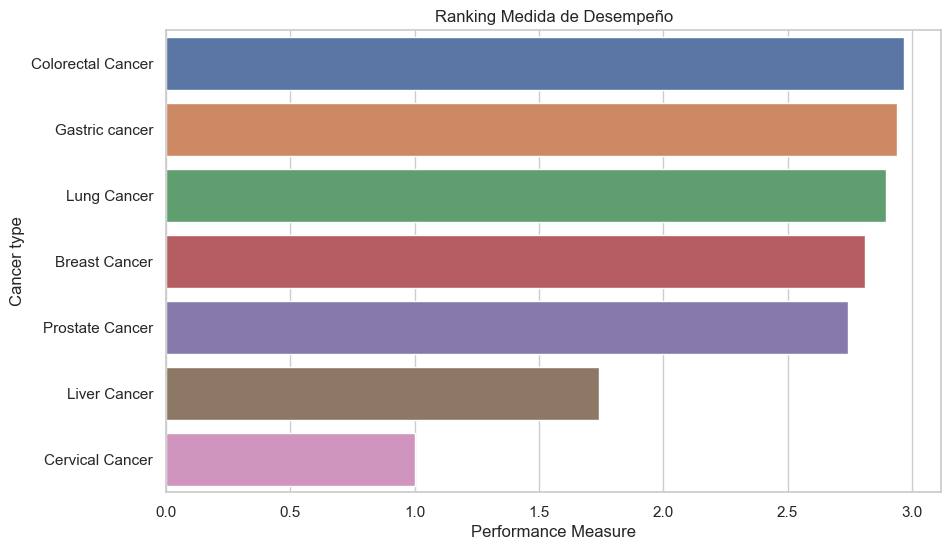

In [30]:
# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=resultadosfinales, x="Medida de Desempeño", y=resultadosfinales.index, palette="deep")

# Personalizar
plt.xlabel("Performance Measure")
plt.ylabel("Cancer type")
plt.title("Ranking Performance Measure")
plt.show()

/tmp/ipykernel_147788/3740799718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultadosfinales, x="Medida de Desempeño", y=resultadosfinales.index, palette="gray")


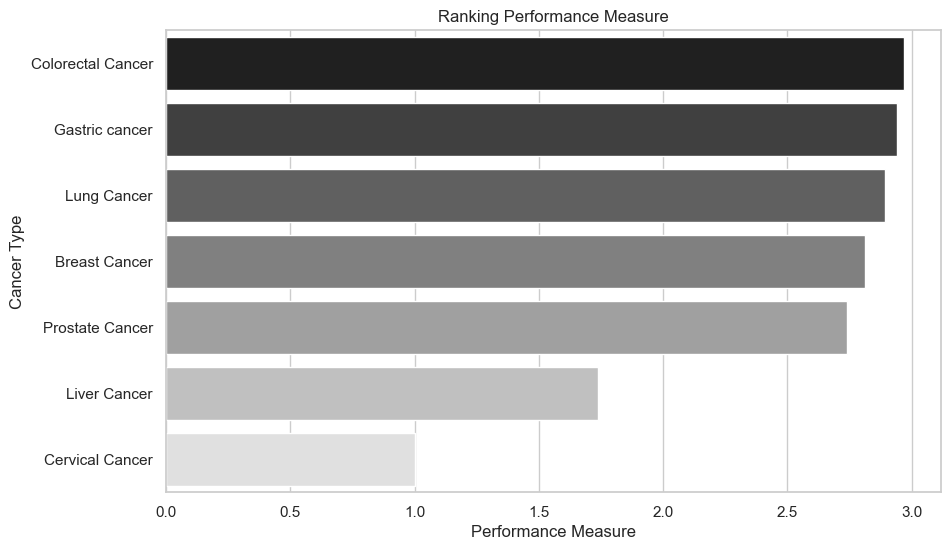

In [35]:
# Configurar estilo en escala de grises
sns.set_style("whitegrid")  # Puedes probar con "darkgrid", "white", "ticks"
sns.set_palette("gray")  # Usar escala de grises

# Crear gráfico de barras en escala de grises
plt.figure(figsize=(10, 6))
sns.barplot(data=resultadosfinales, x="Medida de Desempeño", y=resultadosfinales.index, palette="gray")

# Personalizar
plt.xlabel("Performance Measure")
plt.ylabel("Cancer Type")
plt.title("Ranking Performance Measure")

plt.show()

/tmp/ipykernel_147788/2398788965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultadosfinales, y="Medida de Desempeño", x=resultadosfinales.index, palette="gray")


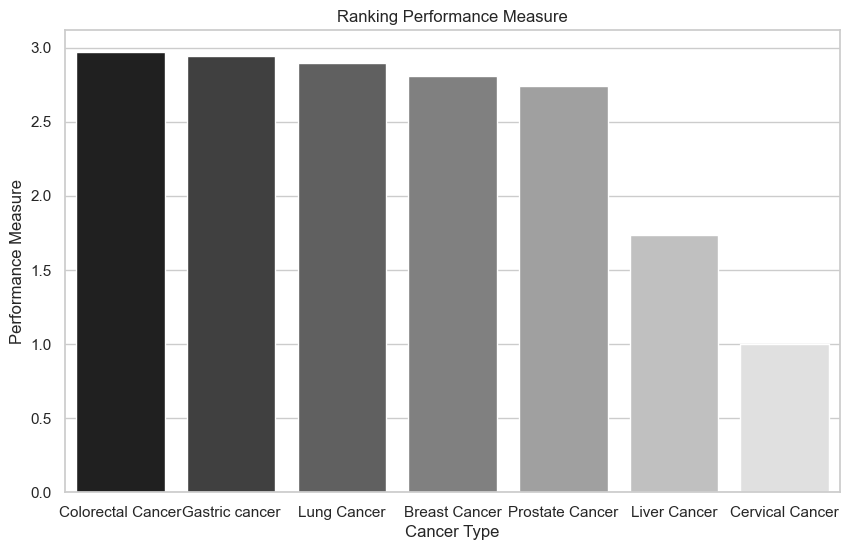

In [36]:
sns.set_style("whitegrid")
sns.set_palette("gray")  # Usar escala de grises

# Crear gráfico de barras en escala de grises (horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(data=resultadosfinales, y="Medida de Desempeño", x=resultadosfinales.index, palette="gray")

# Personalizar
plt.ylabel("Performance Measure")
plt.xlabel("Cancer Type")
plt.title("Ranking Performance Measure")

plt.show()

In [32]:
# Función para interpretar los valores según la escala que le corresponde a cada valor
def interpretar_resultado(coeficiente):
    if coeficiente <= 1 or coeficiente < 2.99:
        return "Malo. Servicios insuficientes o de baja calidad."
    elif 3.00 <= coeficiente <= 4.99:
        return "Regular. Servicios disponibles pero limitados en alcance o efectividad."
    elif 5.00 <= coeficiente <= 6.99:
        return "Bueno. Servicios bien implementados con cobertura adecuada."
    elif coeficiente == 7.00:
        return "Perfecto. Servicios óptimos con excelente cobertura y efectividad."
    else:
        return "Malo, no tiene clasificación"

# Aplicar la interpretación
resultadosfinales["Interpretación"] = resultadosfinales["Medida de Desempeño"].apply(interpretar_resultado)

In [33]:
resultadosfinales

,Distancia positiva,Distnacia negativa,Medida de Desempeño,Interpretación
Colorectal Cancer,0.062691,0.198619,2.969605,Malo. Servicios insuficientes o de baja calidad.
Gastric cancer,0.063420,0.199154,2.941086,Malo. Servicios insuficientes o de baja calidad.
Lung Cancer,0.064518,0.199608,2.894247,Malo. Servicios insuficientes o de baja calidad.
Breast Cancer,0.066581,0.200428,2.809853,Malo. Servicios insuficientes o de baja calidad.
Prostate Cancer,0.068068,0.200210,2.741113,Malo. Servicios insuficientes o de baja calidad.
Liver Cancer,0.000051,0.000088,1.739445,Malo. Servicios insuficientes o de baja calidad.
Cervical Cancer,0.000044,0.000044,0.999956,Malo. Servicios insuficientes o de baja calidad.


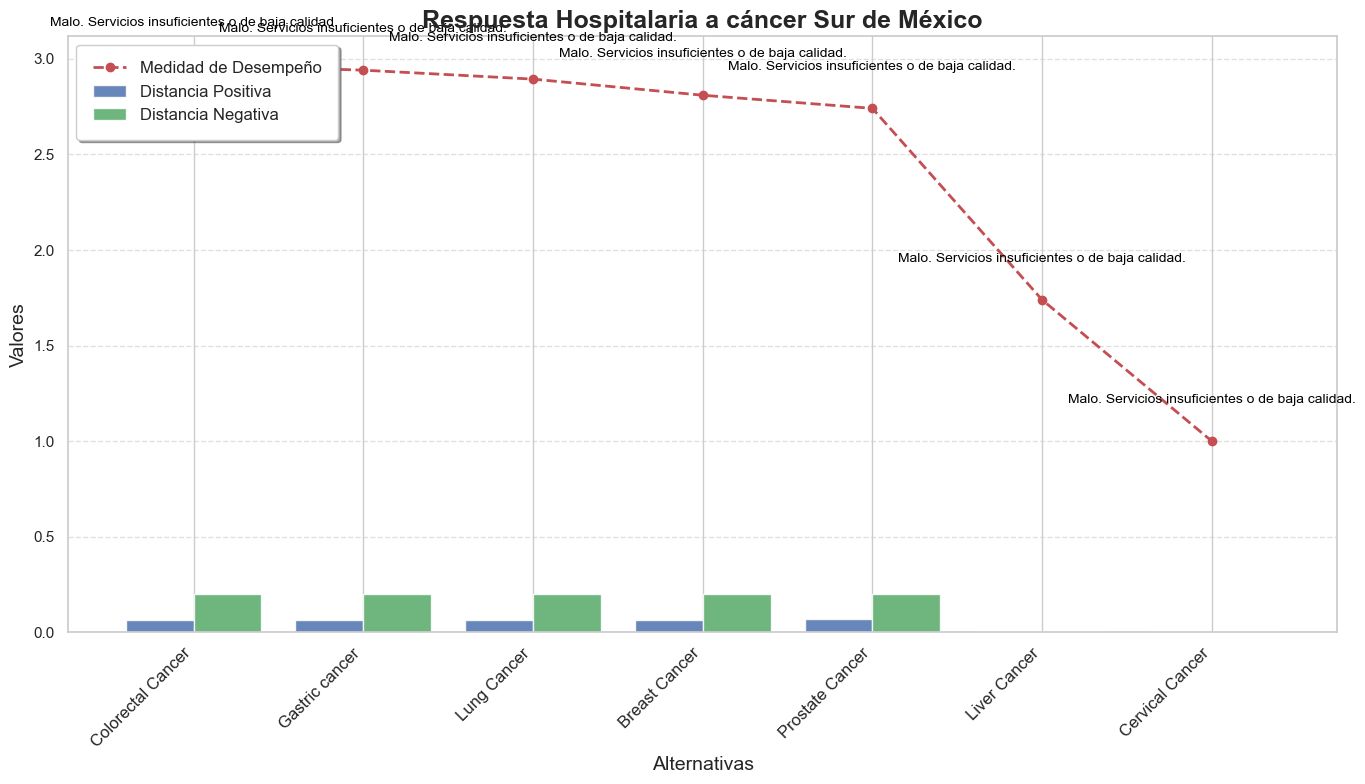

In [34]:
# Configuración inicial
plt.figure(figsize=(14, 8))

# Gráfico de barras distancias positivas y negativas
bar_width = 0.4
indices = range(len(resultadosfinales))
plt.bar(indices, resultadosfinales["Distancia positiva"], width=bar_width, label="Distancia Positiva", alpha=0.85, color='#4C72B0')
plt.bar([i + bar_width for i in indices], resultadosfinales["Distnacia negativa"], width=bar_width, label="Distancia Negativa", alpha=0.85, color='#55A868')

# Línea para el Coeficiente de Aproximación con anotaciones
plt.plot(
    [i + bar_width / 2 for i in indices],
    resultadosfinales["Medida de Desempeño"],
    marker="o",
    color="#C44E52",
    label="Medidad de Desempeño",
    linewidth=2,
    linestyle="--"
)

# Etiquetas de interpretación mejoradas
for i, txt in enumerate(resultadosfinales["Interpretación"]):
    plt.text(i + bar_width / 2, resultadosfinales["Medida de Desempeño"].iloc[i] + 0.2, txt, ha='center', fontsize=10, color="black")

# Etiquetas y título
plt.title("Respuesta Hospitalaria a cáncer Sur de México", fontsize=18, fontweight='bold')
plt.xlabel("Alternativas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], resultadosfinales.index, rotation=45, ha="right", fontsize=12)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, borderpad=1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()